In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.pyplot import rc_context
from tqdm import tqdm
#from scipy.optimize import curve_fit

#import scvi
import pickle
from adjustText import adjust_text

import itertools
#from numba import jit

import gseapy as gp
import random

In [2]:
# adata = sc.concat((sc.read_h5ad('/home/jrlab/Downloads/HUMAN_CELLS_MS0203.h5ad')
#                    ,sc.read_h5ad('/home/jrlab/Downloads/TS_harmonized.h5ad')))

# hippo = sc.read_h5ad('/home/jrlab/Downloads/human_hippo_harmonized.h5ad')

# Signatures

In [2]:
#so I dont have to load all the data if i dont need to
a = set(sc.read_h5ad('/home/jrlab/Downloads/HUMAN_CELLS_MS0203.h5ad').var_names)
b = set(sc.read_h5ad('/home/jrlab/Downloads/TS_harmonized.h5ad').var_names)
c = a.intersection(b)

class aClass:
    def __init__(self, c):
        self.var_names = c

adata = aClass(c)

In [3]:
len(adata.var_names)

21751

In [38]:
hippo = sc.read_h5ad('/home/jrlab/Downloads/human_hippo_harmonized.h5ad')

In [5]:
import senepy as sp

sigs = sp.load_hubs(species = 'Human', sig_type = 'cell_type')
signatures = sigs.hubs
sig_metadata = sigs.metadata

In [6]:
all_genes_redundant = []

for x in list(signatures):
    all_genes_redundant += [x[0] for x in signatures[x]]

In [7]:
all_genes_nr = list(set(all_genes_redundant))

In [8]:
len(all_genes_nr)

13553

In [9]:
mcs = sigs.merge_hubs(sigs.metadata,
                new_name = 'Universal',
                calculate_thresh = True,
                bg_N = len(adata.var_names),
                     p_thres = 0.01)

mcs

A gene will occur 7 times at 0.42% chance
Threfore 7 is the calculated_threshold


,Gene,Count,p value,q value
0,MMP9,14,5.966672e-12,8.086630e-08
1,ITM2C,13,1.116111e-10,5.042215e-07
2,MYL9,13,1.116111e-10,5.042215e-07
3,PTGS1,12,1.821609e-09,4.114711e-06
4,DMTN,12,1.821609e-09,4.114711e-06
...,...,...,...,...
729,MBTD1,7,2.261102e-04,4.175030e-03
730,SLC30A1,7,2.261102e-04,4.175030e-03
731,CMTR1,7,2.261102e-04,4.175030e-03
732,GALM,7,2.261102e-04,4.175030e-03


In [10]:
mcs['nlogp'] = -np.log10(mcs['q value'])
mcs['prev'] = mcs.Count/(len(signatures) -1 )* 100 ##### !!!!!! merge_hubs added a signature after so need to remove 1

In [11]:
mcs

,Gene,Count,p value,q value,nlogp,prev
0,MMP9,14,5.966672e-12,8.086630e-08,7.092232,31.111111
1,ITM2C,13,1.116111e-10,5.042215e-07,6.297379,28.888889
2,MYL9,13,1.116111e-10,5.042215e-07,6.297379,28.888889
3,PTGS1,12,1.821609e-09,4.114711e-06,5.385661,26.666667
4,DMTN,12,1.821609e-09,4.114711e-06,5.385661,26.666667
...,...,...,...,...,...,...
729,MBTD1,7,2.261102e-04,4.175030e-03,2.379340,15.555556
730,SLC30A1,7,2.261102e-04,4.175030e-03,2.379340,15.555556
731,CMTR1,7,2.261102e-04,4.175030e-03,2.379340,15.555556
732,GALM,7,2.261102e-04,4.175030e-03,2.379340,15.555556


In [12]:
all_genes_redundant.count('CDKN2A')

9

In [12]:
##depricated
# out = []
# for gene in all_genes_nr:
#     out.append([gene, all_genes_redundant.count(gene)])

# mcs = pd.DataFrame(out, columns = ['gene', 'Count']).sort_values('Count', ascending = False)


# #random distribution of gene commonality counts. ie, how many hubs were a gene in by chance

# out = []
# for x in tqdm(range(10000)):
    
#     all_genes_redundant_temp = []
#     for y in range(len(sig_metadata)):
#         s = sig_metadata.iloc[y].size
#         l = random.choices(adata.var_names, k = s)
#         all_genes_redundant_temp += l
            
#     all_genes_nr_temp = list(set(all_genes_redundant_temp))
    

#     for gene in all_genes_nr_temp:
#         out += [all_genes_redundant.count(gene)]


# out = np.array(out)

# def calc_mcg_p(x):
#     return len(out[out >= x])/len(out)

# mcs['p'] = mcs['Count'].map(calc_mcg_p)

In [13]:
len(signatures)

46

In [14]:
#mcs.to_pickle('../data/files/6.1_mcs.pickle')

In [15]:
# mcs = pd.read_pickle('../data/files/6.1_mcs.pickle')

In [16]:
0.003468*100

0.3468

In [17]:
mcs.tail()

,Gene,Count,p value,q value,nlogp,prev
729,MBTD1,7,0.000226,0.004175,2.37934,15.555556
730,SLC30A1,7,0.000226,0.004175,2.37934,15.555556
731,CMTR1,7,0.000226,0.004175,2.37934,15.555556
732,GALM,7,0.000226,0.004175,2.37934,15.555556
733,TMEM175,7,0.000226,0.004175,2.37934,15.555556


In [24]:
sub = mcs[:30]

new_row = {'Gene': '0.3% chance', 'Count': 7, 'p value': 0.000226,
           'q value': 0.004175, 'nlogp':2.37934, 'prev':15.555556}

# append the new row to the DataFrame
sub = pd.concat((sub, pd.DataFrame([new_row])))

In [25]:
sub

,Gene,Count,p value,q value,nlogp,prev
0,MMP9,14,5.966672e-12,8.086630e-08,7.092232,31.111111
1,ITM2C,13,1.116111e-10,5.042215e-07,6.297379,28.888889
2,MYL9,13,1.116111e-10,5.042215e-07,6.297379,28.888889
3,PTGS1,12,1.821609e-09,4.114711e-06,5.385661,26.666667
4,DMTN,12,1.821609e-09,4.114711e-06,5.385661,26.666667
5,AKR1B1,12,1.821609e-09,4.114711e-06,5.385661,26.666667
6,ATAD2,11,2.582508e-08,2.187546e-05,4.660043,24.444444
7,CEP78,11,2.582508e-08,2.187546e-05,4.660043,24.444444
8,KDM1B,11,2.582508e-08,2.187546e-05,4.660043,24.444444
9,CCL3,11,2.582508e-08,2.187546e-05,4.660043,24.444444


In [26]:
mcs[mcs.Gene == 'CDKN2A']

,Gene,Count,p value,q value,nlogp,prev
76,CDKN2A,9,0.000003,0.000339,3.469633,20.0


### Fig 4E

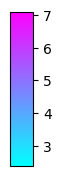

In [27]:
import matplotlib as mpl
from matplotlib import cm

fig, ax = plt.subplots(figsize = (0.3, 2))

cmap = mpl.cm.cool
#norm = mpl.colors.Normalize(vmin = sub.p.min(), vmax = sub.p.max())
norm = mpl.colors.Normalize(vmin = sub.nlogp.min(), vmax = sub.nlogp.max())

mapper = cm.ScalarMappable(norm = norm, cmap = cm.cool)

cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')

plt.savefig('figures/R1_4E_pt2_R1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
plt.savefig('figures/R1_4E_pt2_R1.svg', bbox_inches = 'tight', transparent = True)

#this is -log q value


/tmp/ipykernel_2159642/3832730917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = sub, x = 'prev', y = 'Gene', palette = mapper.to_rgba(sub.nlogp.values),
/tmp/ipykernel_2159642/3832730917.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data = sub, x = 'prev', y = 'Gene', palette = mapper.to_rgba(sub.nlogp.values),


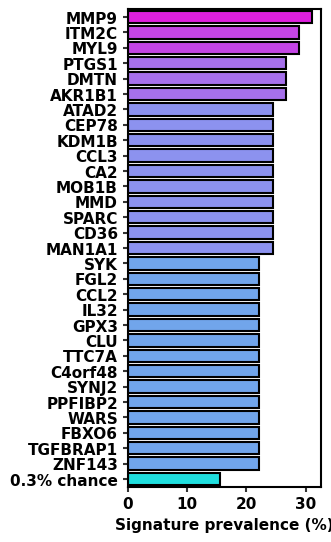

In [28]:
plt.figure(figsize = (2.5,6.2))

ax = sns.barplot(data = sub, x = 'prev', y = 'Gene', palette = mapper.to_rgba(sub.nlogp.values),
                edgecolor = 'k', lw = 1.5)

plt.yticks(size = 11, weight = 'bold')
plt.xticks(size = 11, weight = 'bold')


for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(1.5)
    
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

ax.tick_params(width = 1.5, color = '0.2')


plt.xlabel("Signature prevalence (%)", size = 11, weight = 'bold')
plt.ylabel('')

plt.savefig('figures/R1_4E_pt1_R1.png', dpi = 600, bbox_inches = 'tight', transparent = True)
plt.savefig('figures/R1_4E_pt1_R1.svg', bbox_inches = 'tight', transparent = True)

plt.show()

In [13]:
enr = gp.enrichr(gene_list= mcs.Gene,
             gene_sets=['KEGG_2019_Human', 'GO_Biological_Process_2021'],
             organism='human', # don't forget to set organism to the one you desired!
             outdir=None, # don't write to disk,
             background = list(adata.var_names)
            )

In [17]:
uni_enr = enr.results

In [20]:
res = uni_enr[uni_enr['Adjusted P-value'] < 0.05].sort_values('Adjusted P-value').reset_index(drop = True)
res['nlog10'] = -np.log10(res['Adjusted P-value'])

res = res[res.Gene_set == 'KEGG_2019_Human']

In [21]:
res

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,nlog10
0,KEGG_2019_Human,Epstein-Barr virus infection,9.371097e-07,0.000169,0,0,3.679968,51.079668,IFNAR2;SYK;TAP2;PIK3R2;CD3E;CCNA2;CCND2;OAS1;P...,3.772474
1,KEGG_2019_Human,Human T-cell leukemia virus 1 infection,1.232554e-06,0.000169,0,0,3.490319,47.490750,STAT5B;EGR1;NRP1;CRTC2;CDKN2A;CRTC1;PIK3R2;CD3...,3.772474
5,KEGG_2019_Human,Inositol phosphate metabolism,3.615220e-05,0.002476,0,0,5.060353,51.756137,PLCB3;MTMR2;PIKFYVE;INPP5A;PIK3CA;ITPK1;PI4KA;...,2.606175
6,KEGG_2019_Human,Toll-like receptor signaling pathway,3.511742e-05,0.002476,0,0,4.288189,43.983151,IFNAR2;CCL4L2;PIK3R2;PIK3CA;TRAF3;CTSK;CCL5;CC...,2.606175
8,KEGG_2019_Human,AMPK signaling pathway,5.394635e-05,0.002786,0,0,3.835875,37.697143,PFKFB2;CRTC2;PFKFB3;PIK3R2;PPP2R5D;MTOR;CAMKK2...,2.554999
9,KEGG_2019_Human,Influenza A,6.101003e-05,0.002786,0,0,3.254652,31.584681,IFNAR2;IL33;NLRX1;PIK3R2;OAS1;PIK3CA;CCL5;CASP...,2.554999
10,KEGG_2019_Human,Hematopoietic cell lineage,7.559082e-05,0.002959,0,0,4.243294,40.269609,CSF1;HLA-DPB1;HLA-DRA;CD14;CD36;IL7R;CD24;CD3E...,2.528878
11,KEGG_2019_Human,Phosphatidylinositol signaling system,1.029234e-04,0.003525,0,0,4.092944,37.579473,MTMR2;PLCB3;PIKFYVE;INPP5A;PIK3CA;ITPK1;PI4KA;...,2.452825
12,KEGG_2019_Human,Rheumatoid arthritis,1.319333e-04,0.004017,0,0,4.305876,38.465316,CSF1;CTSK;CCL5;CCL3;HLA-DPB1;CCL2;HLA-DRA;TCIR...,2.396138
13,KEGG_2019_Human,Pathways in cancer,2.232280e-04,0.006116,0,0,2.039007,17.142576,RALB;LRP5;PIK3R2;BRCA2;CBL;ETS1;CCND2;SUFU;GNA...,2.213501


In [22]:
mcs

,Gene,Count,p value,q value,nlogp,prev
0,MMP9,14,5.966672e-12,8.086630e-08,7.092232,31.111111
1,ITM2C,13,1.116111e-10,5.042215e-07,6.297379,28.888889
2,MYL9,13,1.116111e-10,5.042215e-07,6.297379,28.888889
3,PTGS1,12,1.821609e-09,4.114711e-06,5.385661,26.666667
4,DMTN,12,1.821609e-09,4.114711e-06,5.385661,26.666667
...,...,...,...,...,...,...
729,MBTD1,7,2.261102e-04,4.175030e-03,2.379340,15.555556
730,SLC30A1,7,2.261102e-04,4.175030e-03,2.379340,15.555556
731,CMTR1,7,2.261102e-04,4.175030e-03,2.379340,15.555556
732,GALM,7,2.261102e-04,4.175030e-03,2.379340,15.555556


### Fig 4F

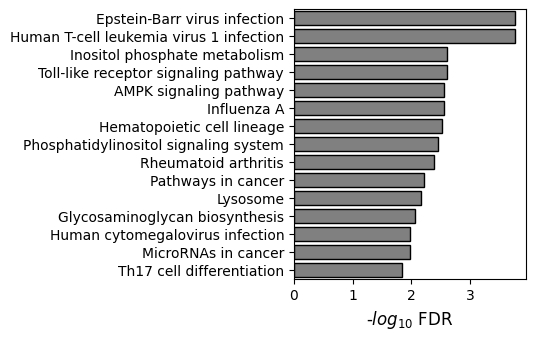

In [32]:
plt.figure(figsize = (3,3.5))

ax = sns.barplot(data = res[0:15], x = 'nlog10', y = 'Term', color = 'grey', edgecolor = 'k', lw = 1)


plt.ylabel('')
plt.xlabel("-$log_{10}$ FDR", size = 12)

plt.savefig('figures/R1_4F.png', dpi = 600, bbox_inches = 'tight', transparent = True)
plt.savefig('figures/R1_4F.svg', bbox_inches = 'tight', transparent = True)

plt.show()

In [ ]:
#there are interesting GO pathways too

In [35]:
adata.var_names

{'LINC00613',
 'STX7',
 'PEA15',
 'TCTEX1D4',
 'CASP1',
 'FCRL5',
 'DMRT3',
 'FRMD5',
 'PKHD1L1',
 'SPPL2A',
 'TMA16',
 'PDYN',
 'RBM34',
 'NUP188',
 'RERG-AS1',
 'RGS14',
 'TTC3-AS1',
 'NOVA1',
 'OIP5',
 'IGHV3-22',
 'NGDN',
 'TPRA1',
 'RAD52',
 'NT5C1B',
 'KCNJ15',
 'LINC01251',
 'PHC3',
 'TRBV8-2',
 'TCF24',
 'UBE2Q2L',
 'TMLHE-AS1',
 'ELFN1',
 'SLC41A3',
 'LUC7L2',
 'NRDC',
 'FAM98C',
 'TRAV29DV5',
 'HBE1',
 'TRPC6',
 'LINC01374',
 'KRTDAP',
 'PIBF1',
 'AC144652.1',
 'CRB1',
 'PPP1R3A',
 'TCAF1',
 'MICAL2',
 'SSTR4',
 'GOLT1A',
 'MAPK1IP1L',
 'DUOXA1',
 'GHSR',
 'NPHS2',
 'LINC01363',
 'UBE2C',
 'OGFRL1',
 'SSBP3',
 'IFI27L2',
 'AK3',
 'TOMM40L',
 'TDRD1',
 'NXF3',
 'VCY1B',
 'SDC4',
 'AADACL4',
 'SNX1',
 'MAPKAP1',
 'FGL2',
 'ZNF282',
 'IGHD1-1',
 'ABHD12',
 'AP1S2',
 'AC034228.2',
 'CHI3L1',
 'RNF165',
 'DLGAP1-AS2',
 'BOK',
 'CCNY',
 'VMO1',
 'STK16',
 'LY6G5C',
 'LINC00921',
 'TPPP',
 'ITGBL1',
 'ARHGEF19-AS1',
 'OR9A4',
 'SERPINB13',
 'DCTN5',
 'ALOX12-AS1',
 'OR10A2',
 'ADAM1

In [39]:
out = []


for hub in tqdm(list(signatures)):
    
    
    if hub[0] == 'hippocampus':
        var_names = hippo.var_names.tolist()
    else:
        var_names = list(adata.var_names)
    
    

    test = signatures[hub]

    test = [x[0] for x in test]


    for i in range(0,10):
        try:
            enr = gp.enrichr(gene_list= test,
                         gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2021', 'WikiPathways_2019_Human'],
                         organism='human', # don't forget to set organism to the one you desired!
                         outdir=None, # don't write to disk,
                         background = var_names
                        )
            break
        except:
            pass
        

    res = enr.results

    res = res[res['Adjusted P-value'] <= 0.05].reset_index(drop = True)
    
    
    res['tissue'] = hub[0]
    res['cell'] = hub[1]
    
    out.append(res)
    


100%|███████████████████████████████████████████| 46/46 [04:59<00:00,  6.51s/it]


In [40]:
df = pd.concat(out)

df = df[df.Gene_set != 'WikiPathways_2019_Human'] #some redundancy with GO

In [41]:
#remove some reduntant GO pathways

removal = [
    'neutrophil degranulation (GO:0043312)',
    'neutrophil activation involved in immune response (GO:0002283)'
]

df = df[~df.Term.isin(removal)]

df

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,tissue,cell
0,KEGG_2021_Human,Aminoacyl-tRNA biosynthesis,0.000007,0.001655,0,0,15.865442,187.387116,LARS2;SARS2;NARS2;GATB;PSTK;WARS2,blood,memory b cell
1,KEGG_2021_Human,Herpes simplex virus 1 infection,0.000041,0.004536,0,0,2.674845,27.042135,ZNF100;ZNF441;ZNF484;HLA-DRB5;ZNF571;ZNF273;ZN...,blood,memory b cell
2,GO_Biological_Process_2021,DNA geometric change (GO:0032392),0.000007,0.015720,0,0,15.865442,187.387116,ZRANB3;RAD50;RECQL5;MCM9;HMGB3;MTERF1,blood,memory b cell
3,GO_Biological_Process_2021,platelet degranulation (GO:0002576),0.000029,0.018899,0,0,5.062291,52.919884,SPARC;SERPINA1;ACTN1;ITGB3;ITGA2B;CDC37L1;F13A...,blood,memory b cell
4,GO_Biological_Process_2021,tRNA aminoacylation (GO:0043039),0.000036,0.018899,0,0,16.710588,171.079125,AIMP2;LARS2;SARS2;GATB;WARS2,blood,memory b cell
...,...,...,...,...,...,...,...,...,...,...,...
82,GO_Biological_Process_2021,regulation of chromatin organization (GO:1902275),0.000721,0.045210,0,0,12.790259,92.539470,PARG;SETD1A;METTL4;MKI67,U,n
83,GO_Biological_Process_2021,semaphorin-plexin signaling pathway involved i...,0.000721,0.045210,0,0,12.790259,92.539470,NRP1;NRP2;PLXNA1;PLXNC1,U,n
84,GO_Biological_Process_2021,water-soluble vitamin metabolic process (GO:00...,0.000762,0.046902,0,0,4.064159,29.180954,DHFR;SLC23A2;ABCC1;MTRR;NNMT;RFK;FPGS;SLC25A32...,U,n
85,GO_Biological_Process_2021,regulation of signal transduction (GO:0009966),0.000789,0.047744,0,0,2.653975,18.960663,ACVR1;SRC;PTCH1;RGS16;AKR1C3;AXIN1;RFNG;CD3E;Z...,U,n


In [43]:
top_20 = df.groupby('Term').count().sort_values('Gene_set', ascending = False)[0:20]

order_d = dict(zip(top_20.index, range(20)))

overlap_d = dict(zip(top_20.index, top_20.Gene_set))

top_20

,Gene_set,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,tissue,cell
Term,,,,,,,,,,
cytokine-mediated signaling pathway (GO:0019221),21,21,21,21,21,21,21,21,21,21
neutrophil mediated immunity (GO:0002446),18,18,18,18,18,18,18,18,18,18
cellular response to cytokine stimulus (GO:0071345),18,18,18,18,18,18,18,18,18,18
Influenza A,16,16,16,16,16,16,16,16,16,16
regulated exocytosis (GO:0045055),14,14,14,14,14,14,14,14,14,14
Hematopoietic cell lineage,14,14,14,14,14,14,14,14,14,14
Cytokine-cytokine receptor interaction,13,13,13,13,13,13,13,13,13,13
Phagosome,13,13,13,13,13,13,13,13,13,13
platelet degranulation (GO:0002576),13,13,13,13,13,13,13,13,13,13


In [44]:
def fix_term(x):
    if '(GO:' in x:
        return ' '.join(x.split(' ')[0:-1])
                        
    if x.split(' ')[-1].startswith('WP'):
        return ' '.join(x.split(' ')[0:-1])
                        
    else:
        return x
    
to_graph = df[df.Term.isin(top_20.index)]


to_graph['nlog10p'] = -np.log10(to_graph['Adjusted P-value'])

to_graph['Orderer'] = to_graph.Term.map(order_d)

to_graph = to_graph.sort_values('Orderer')


to_graph['Overlap'] = to_graph.Term.map(overlap_d)

to_graph['frac'] = to_graph['Overlap']/len(signatures) * 100


to_graph['term2'] = to_graph.Term.map(fix_term)

cell_type_2_annotations = pd.read_csv('../data/annotations/human/cell_classes.csv')

class_d = dict(zip(cell_type_2_annotations.cell_type_2, cell_type_2_annotations['class']))

to_graph['Class'] = to_graph.cell.map(class_d)

#cap at 10, make sure to put >= 10 in figure

to_graph['nlog10p'][to_graph['nlog10p'] > 10] = 10

/tmp/ipykernel_2159642/1752835246.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_graph['nlog10p'] = -np.log10(to_graph['Adjusted P-value'])
/tmp/ipykernel_2159642/1752835246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_graph['Orderer'] = to_graph.Term.map(order_d)
/tmp/ipykernel_2159642/1752835246.py:36: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-

In [45]:
to_graph

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,tissue,cell,nlog10p,Orderer,Overlap,frac,term2,Class
55,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),2.353827e-04,1.516257e-02,0,0,6.273587,52.411417,SOCS2;IL1RL1;BCL2L11;CEBPD;TIMP1;IL6R;RELA,hippocampus,excitatory neuron,1.819227,0,21,45.652174,cytokine-mediated signaling pathway,parenchymal
31,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),1.962418e-10,1.987376e-07,0,0,4.090273,91.424457,CCL13;CXCL9;F13A1;TNFRSF11A;LMNB1;IL18BP;CCL8;...,lung,macrophage,6.701720,0,21,45.652174,cytokine-mediated signaling pathway,immune
57,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),5.010371e-10,2.051389e-07,0,0,3.385935,72.507558,CDKN1A;CXCL8;SPI1;FPR1;F13A1;CSF2RB;TNFRSF11A;...,blood,t cell,6.687952,0,21,45.652174,cytokine-mediated signaling pathway,immune
27,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),5.920284e-06,1.146562e-03,0,0,3.342129,40.229632,IFITM3;HLA-DRB5;CXCL8;TNFRSF13B;FPR1;F13A1;PTP...,blood,naive b cell,2.940603,0,21,45.652174,cytokine-mediated signaling pathway,immune
82,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),9.117819e-07,2.734572e-04,0,0,2.249004,31.278845,CSF2;CSF3R;ITGAM;FLT3;INPPL1;F13A1;IL1RAP;PIK3...,skin,immune cell,3.563111,0,21,45.652174,cytokine-mediated signaling pathway,immune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,KEGG_2021_Human,MicroRNAs in cancer,2.188364e-03,3.866643e-02,0,0,4.139941,25.355488,ST14;ITGB3;TPM1;PIK3CB;BRCA1;THBS1;MMP9,blood,naive b cell,1.412666,19,11,23.913043,MicroRNAs in cancer,immune
31,KEGG_2021_Human,MicroRNAs in cancer,4.032519e-03,3.011788e-02,0,0,3.329417,18.356290,MARCKS;CDKN2A;PLAU;TNC;PIK3R2;PTGS2;MMP9;TP63,skin,basal cell,1.521176,19,11,23.913043,MicroRNAs in cancer,progenitor
12,KEGG_2021_Human,MicroRNAs in cancer,2.188364e-03,3.866643e-02,0,0,4.139941,25.355488,ST14;ITGB3;TPM1;PIK3CB;BRCA1;THBS1;MMP9,blood,neutrophil,1.412666,19,11,23.913043,MicroRNAs in cancer,immune
31,KEGG_2021_Human,MicroRNAs in cancer,4.032519e-03,3.011788e-02,0,0,3.329417,18.356290,MARCKS;CDKN2A;PLAU;TNC;PIK3R2;PTGS2;MMP9;TP63,lung,type ii pneumocyte,1.521176,19,11,23.913043,MicroRNAs in cancer,epithelial


### Figure 4G

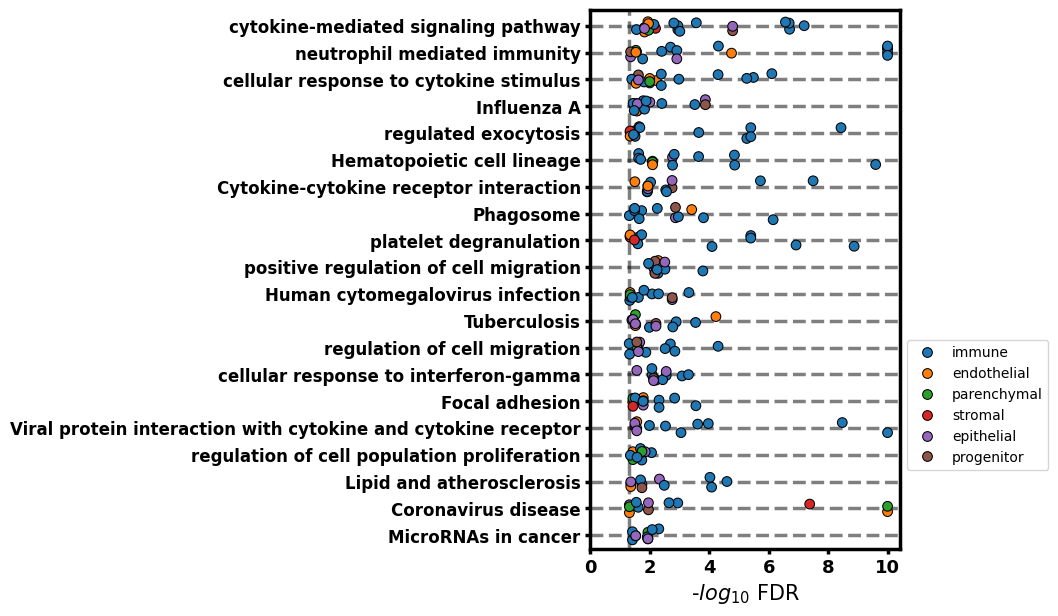

In [47]:
plt.figure(figsize = (4, 7))

#ax = sns.barplot(data = to_graph, x = 'nlog10p', y = 'term2', color = 'grey',
#                capsize = 0.5, lw = 1.5, errwidth = 0)


kwargs = {'edgecolor':'k', 'linewidth':0.75}

ax = sns.stripplot(data = to_graph, x = 'nlog10p', y = 'term2', s = 7, **kwargs,
                  hue = 'Class', jitter = .25,
                  hue_order = ['immune', 'endothelial', 'parenchymal', 'stromal', 'epithelial', 'progenitor'])



for x in range(len(top_20)):
#    plt.text(x = 0.1, y = x, s = str(round(top_20.iloc[x].Overlap/len(hubs),2)), va = 'center')
    ax.axhline(x, zorder = 0, ls = '--', c = 'k', alpha = 0.5, lw = 2.5)
    
    
ax.axvline(-np.log10(0.05), ls = '--', c = 'k', alpha = 0.5, lw = 2.5)

    
plt.xlim(left = 0)

ax.legend(bbox_to_anchor=(1, .4))



for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)


plt.xticks(size = 13, ha = 'center', weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

ax.tick_params(width = 2.5)

plt.ylabel('')
plt.xlabel("-$log_{10}$ FDR", size = 15)

plt.ylim(top = -.6)


plt.savefig('figures/R1_4G.png', dpi = 600, bbox_inches = 'tight', transparent = True)
plt.savefig('figures/R1_4G.svg', bbox_inches = 'tight', transparent = True)

plt.show()

In [50]:
res[res.Gene_set == 'KEGG_2021_Human']

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes,tissue,cell
0,KEGG_2021_Human,Epstein-Barr virus infection,0.000001,0.000122,0,0,3.658883,50.471836,IFNAR2;SYK;TAP2;PIK3R2;CD3E;CCNA2;CCND2;OAS1;P...,U,n
1,KEGG_2021_Human,Human T-cell leukemia virus 1 infection,0.000001,0.000122,0,0,3.490319,47.490750,EGR1;STAT5B;NRP1;CRTC2;CDKN2A;CRTC1;PIK3R2;CD3...,U,n
2,KEGG_2021_Human,Influenza A,0.000001,0.000122,0,0,3.896732,52.867188,IFNAR2;IL33;NLRX1;PIK3R2;RAB11B;OAS1;PIK3CA;TR...,U,n
3,KEGG_2021_Human,Inositol phosphate metabolism,0.000032,0.001827,0,0,5.142217,53.263868,PLCB3;MTMR2;PIKFYVE;INPP5A;PIK3CA;ITPK1;PI4KA;...,U,n
4,KEGG_2021_Human,Toll-like receptor signaling pathway,0.000035,0.001827,0,0,4.288189,43.983151,IFNAR2;CCL4L2;PIK3R2;PIK3CA;TRAF3;CTSK;CCL5;CC...,U,n
5,KEGG_2021_Human,Lipid and atherosclerosis,0.000038,0.001827,0,0,3.022307,30.734759,POU2F1;SRC;CYBB;PIK3R2;MMP9;PLCB3;PIK3CA;TRAF3...,U,n
6,KEGG_2021_Human,AMPK signaling pathway,0.000049,0.002008,0,0,3.872593,38.418490,PFKFB2;CRTC2;PFKFB3;PIK3R2;PPP2R5D;MTOR;CAMKK2...,U,n
7,KEGG_2021_Human,Phosphatidylinositol signaling system,0.000076,0.002666,0,0,4.243294,40.269609,MTMR2;PLCB3;PIKFYVE;INPP5A;PIK3CA;ITPK1;PI4KA;...,U,n
8,KEGG_2021_Human,Hematopoietic cell lineage,0.000084,0.002666,0,0,4.191970,39.345016,CSF1;HLA-DPB1;HLA-DRA;CD14;CD36;CD24;IL7R;CD3E...,U,n
9,KEGG_2021_Human,Lysosome,0.000109,0.002905,0,0,3.565327,32.516927,ARSA;ABCA2;FUCA2;AP1B1;NAGA;TCIRG1;GNS;SGSH;GA...,U,n


In [57]:
import subprocess
from io import StringIO
from Bio import SeqIO

In [54]:
#TF

In [64]:
hg38 = SeqIO.to_dict(SeqIO.parse('scripts/tf/hg19.fa', 'fasta'))

In [65]:
out = []

for hub in tqdm(list(signatures)):
    
    if len(signatures[hub]) < 5:
        continue
    
    
    #convert hub list to \n sep string
    seq_str = ''
    for item in [x[0] for x in signatures[hub]]:
        seq_str += str(item) + '\n'
    
    #pass that string to this R script which returns a gene region df
    child = subprocess.Popen(['scripts/tf/sym_to_reg_human.R'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)
    child.stdin.write(seq_str.encode())
    child_out = child.communicate()[0].decode('utf8')
    a = StringIO(child_out)
    child.stdin.close()
    
    #read the region df and slice up hg38 into a multi seq fasta
    a = pd.read_csv(a).dropna().reset_index(drop = True)
    a['slice_start'] = a['slice_start'].astype('int')
    a['slice_end'] = a['slice_end'].astype('int')
    
    outfa = []
    for row in a.index:
        values = a.iloc[row]
        record = hg38[values.TXCHROM][values.slice_start - 1:values.slice_end -1]
        record.id = values.symbol

        outfa.append(record)
    
    
    with open('tmpdir/test_human.fasta', 'w') as f:
        for seq in outfa:
            f.write( '>' + seq.id + '\n')
            f.write(str(seq.seq) + '\n')
            
            
    #process fasta with meme sea     
    child = subprocess.Popen(['sea', '--p', 'tmpdir/test_human.fasta', '--m',
                          'scripts/tf/JASPAR2020_CORE_vertebrates_non-redundant_pfms_meme.txt', 
                          '--text'], stdout=subprocess.PIPE, stderr=subprocess.DEVNULL)
    child_out = child.communicate()[0].decode('utf8')
    a = StringIO(child_out)
    a = pd.read_csv(a, delimiter='\t').dropna().drop(columns = ['DB'])
    
    a['tissue'] = hub[0]
    a['cell'] = hub[1]
    
    out.append(a)

100%|████████████████████████████████████████| 46/46 [3:45:14<00:00, 293.79s/it]


In [66]:
tf = pd.concat(out)
tf

,RANK,ID,ALT_ID,CONSENSUS,TP,TP%,FP,FP%,ENR_RATIO,SCORE_THR,PVALUE,LOG_PVALUE,EVALUE,LOG_EVALUE,QVALUE,LOG_QVALUE,tissue,cell
0,1,MA1596.1,ZNF460,GCCTCMGCCTCCCRAG,160.0,44.44,22.0,6.11,7.00,12.0,4.470000e-35,-79.09,3.330000e-32,-72.48,2.010000e-32,-72.99,blood,memory b cell
1,2,MA1587.1,ZNF135,CCTCGACCTCCYRR,148.0,41.11,28.0,7.78,5.14,11.0,5.680000e-27,-60.43,4.240000e-24,-53.82,1.270000e-24,-55.02,blood,memory b cell
2,3,MA0052.4,MEF2A,DDCTAAAAATAGMHH,112.0,31.11,24.0,6.67,4.52,13.0,5.860000e-18,-39.68,4.370000e-15,-33.06,8.770000e-16,-34.67,blood,memory b cell
3,4,MA0660.1,MEF2B,RCTAWAAATAGC,87.0,24.17,15.0,4.17,5.50,8.6,1.290000e-15,-34.29,9.610000e-13,-27.67,1.440000e-13,-29.57,blood,memory b cell
4,5,MA0039.4,KLF4,NNCCCCACCCHN,255.0,70.83,153.0,42.50,1.66,9.6,9.950000e-15,-32.24,7.430000e-12,-25.63,8.930000e-13,-27.74,blood,memory b cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,279,MA0076.2,ELK4,BCRCTTCCGGB,182.0,28.04,146.0,22.50,1.24,11.0,1.260000e-02,-4.37,9.440000e+00,2.24,1.370000e-02,-4.29,U,n
279,280,MA0048.2,NHLH1,CGCAGCTGCK,98.0,15.10,70.0,10.79,1.39,12.0,1.270000e-02,-4.37,9.460000e+00,2.25,1.370000e-02,-4.29,U,n
280,281,MA0855.1,RXRB,GGGGTCAAAGGTCA,98.0,15.10,70.0,10.79,1.39,2.2,1.270000e-02,-4.37,9.460000e+00,2.25,1.370000e-02,-4.29,U,n
281,282,MA0843.1,TEF,BRTTACRTAAYM,184.0,28.35,148.0,22.80,1.24,7.0,1.290000e-02,-4.35,9.660000e+00,2.27,1.390000e-02,-4.28,U,n


In [67]:
#tf.to_pickle('../data/files/R1_6.1_HUMAN_GENE_TF_ENRICHMENT_DF_SIGS.pickle')

In [68]:
tf = pd.read_pickle('../data/files/R1_6.1_HUMAN_GENE_TF_ENRICHMENT_DF_SIGS.pickle')

In [69]:
tf = tf[tf.QVALUE < 0.05]

top_20 = tf.groupby('ALT_ID').count().sort_values('RANK', ascending = False)[0:20]

order_d = dict(zip(top_20.index, range(20)))

overlap_d = dict(zip(top_20.index, top_20.RANK))

top_20

,RANK,ID,CONSENSUS,TP,TP%,FP,FP%,ENR_RATIO,SCORE_THR,PVALUE,LOG_PVALUE,EVALUE,LOG_EVALUE,QVALUE,LOG_QVALUE,tissue,cell
ALT_ID,,,,,,,,,,,,,,,,,
ZNF460,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
MEF2A,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
ZNF135,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
MEF2D,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
RREB1,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
KLF5,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
MEF2B,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
KLF15,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
KLF4,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39


In [70]:
to_graph = tf[tf.ALT_ID.isin(top_20.index)]


#to_graph['nlog10p'] = -np.log10(to_graph['Adjusted P-value'])

to_graph['Orderer'] = to_graph.ALT_ID.map(order_d)

to_graph = to_graph.sort_values('Orderer')


to_graph['Overlap'] = to_graph.ALT_ID.map(overlap_d)

to_graph['frac'] = to_graph['Overlap']/len(signatures) * 100

to_graph['Class'] = to_graph.cell.map(class_d)


to_graph

/tmp/ipykernel_2159642/2557413998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_graph['Orderer'] = to_graph.ALT_ID.map(order_d)


,RANK,ID,ALT_ID,CONSENSUS,TP,TP%,FP,FP%,ENR_RATIO,SCORE_THR,...,EVALUE,LOG_EVALUE,QVALUE,LOG_QVALUE,tissue,cell,Orderer,Overlap,frac,Class
0,1,MA1596.1,ZNF460,GCCTCMGCCTCCCRAG,160.0,44.44,22.0,6.11,7.00,12.0,...,3.330000e-32,-72.48,2.010000e-32,-72.99,blood,memory b cell,0,43,93.478261,immune
1,2,MA1596.1,ZNF460,GCCTCMGCCTCCCRAG,149.0,28.88,28.0,5.43,5.17,12.0,...,2.810000e-22,-49.62,8.390000e-23,-50.83,lung,fibroblast,0,43,93.478261,stromal
0,1,MA1596.1,ZNF460,GCCTCMGCCTCCCRAG,438.0,49.16,103.0,11.56,4.22,10.0,...,2.010000e-67,-153.58,8.400000e-68,-154.45,heart,endothelial cell,0,43,93.478261,endothelial
1,2,MA1596.1,ZNF460,GCCTCMGCCTCCCRAG,54.0,20.15,0.0,0.00,55.00,18.0,...,2.120000e-15,-33.79,5.860000e-16,-35.07,lung,macrophage,0,43,93.478261,immune
7,8,MA1596.1,ZNF460,GCCTCMGCCTCCCRAG,106.0,72.60,70.0,47.95,1.51,6.1,...,9.540000e-03,-4.65,9.440000e-04,-6.97,heart,cardiomyocyte,0,43,93.478261,parenchymal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,MA0081.2,SPIB,TYTCACTTCCTCTTTY,746.0,90.10,670.0,80.92,1.11,6.1,...,5.030000e-05,-9.90,2.620000e-07,-15.15,lung,club cell,19,35,76.086957,epithelial
22,23,MA0081.2,SPIB,TYTCACTTCCTCTTTY,201.0,38.95,109.0,21.12,1.84,10.0,...,1.940000e-07,-15.45,5.040000e-09,-19.11,lung,fibroblast,19,35,76.086957,stromal
68,69,MA0081.2,SPIB,TYTCACTTCCTCTTTY,393.0,44.11,253.0,28.40,1.55,9.9,...,2.400000e-09,-19.85,1.460000e-11,-24.95,heart,endothelial cell,19,35,76.086957,endothelial
53,54,MA0081.2,SPIB,TYTCACTTCCTCTTTY,853.0,45.88,560.0,30.12,1.52,9.5,...,1.670000e-20,-45.54,1.060000e-22,-50.60,skin,mitotic cell,19,35,76.086957,progenitor


/tmp/ipykernel_2159642/1521245881.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  to_graph['ENR_RATIO'][to_graph['ENR_RATIO'] > 15] = 15 #because of a few high outliers, make sure to add >= on plot
/tmp/ipykernel_2159642/1521245881.py:1:

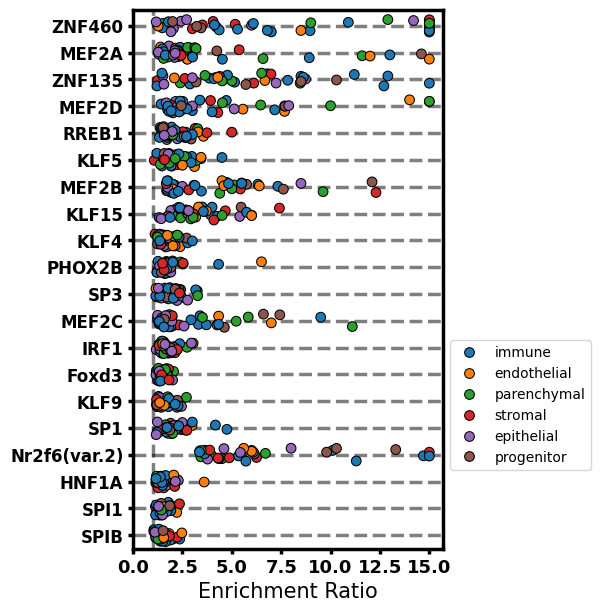

In [71]:
to_graph['ENR_RATIO'][to_graph['ENR_RATIO'] > 15] = 15 #because of a few high outliers, make sure to add >= on plot

#note the few above 10 have been reduced to 10

plt.figure(figsize = (4, 7))

#ax = sns.barplot(data = to_graph, x = 'ENR_RATIO', y = 'ALT_ID', color = 'grey',
#                capsize = 0.5, lw = 1.5, errwidth = 0)


kwargs = {'edgecolor':'k', 'linewidth':0.75}

ax = sns.stripplot(data = to_graph, x = 'ENR_RATIO', y = 'ALT_ID', s = 7, **kwargs,
                  hue = 'Class', jitter = .25,
                  hue_order = ['immune', 'endothelial', 'parenchymal', 'stromal', 'epithelial', 'progenitor'])



for x in range(len(top_20)):
   # plt.text(x = 0.1, y = x, s = str(round(top_20.iloc[x].Overlap/len(hubs),2)), va = 'center')
    ax.axhline(x, zorder = 0, ls = '--', c = 'k', alpha = 0.5, lw = 2.5)

ax.axvline(1,zorder = 0, ls = '--', c = 'k', alpha = 0.5, lw = 2.5)
    
plt.xlim(left = 0)

ax.legend(bbox_to_anchor=(1, .4))



for axis in ['bottom', 'left', 'top', 'right']:
    ax.spines[axis].set_linewidth(2.5)


plt.xticks(size = 13, ha = 'center', weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

ax.tick_params(width = 2.5)

plt.ylabel('')
plt.xlabel("Enrichment Ratio", size = 15)

plt.ylim(top = -.6)

plt.savefig('figures/R1_4H.png', dpi = 600, bbox_inches = 'tight', transparent = True)
plt.savefig('figures/R1_4H.svg', bbox_inches = 'tight', transparent = True)

plt.show()